Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [ ]:
#Import required libraries
import numpy as np
import pandas as pd
import spacy
import string
import nltk

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [ ]:
#Load the data
tweets_df=pd.read_csv("/content/Elon_musk.csv",encoding='cp1252',index_col=0)
tweets_df.head()

,Text
1,@kunalb11 I’m an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...


In [ ]:
tweets_df.shape

(1999, 1)

We have 1999 tweets from Elon Musk

##Text Preprocessing

We need to remove unwanted elements from these tweets like urls,tags,hashtags and repeated tweets as they are not important for sentiment analysis.

In [ ]:
#Use regular expression to remove unwanted elements
import re
def clean_tweets(tweets):
  tweets=re.sub('@[A-Za-z0-9]+','',tweets) #To remove @
  tweets=re.sub('#','',tweets) #To remove #
  tweets=re.sub('RT[\s]+','',tweets) #To remove retweets
  tweets=re.sub('https?:\/\/\S+','',tweets) #To remove links
  tweets=tweets.translate(str.maketrans('', '', string.punctuation))

  return tweets

In [ ]:
tweets_df["Cleaned_tweets"] = tweets_df["Text"].apply(lambda Text: clean_tweets(Text))
tweets_df.head()

,Text,Cleaned_tweets
1,@kunalb11 I’m an alien,I’m an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,AACarmack Ray tracing on Cyberpunk with HDR is...
3,@joerogan @Spotify Great interview!,Great interview
4,@gtera27 Doge is underestimated,Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execu...


In [ ]:
tweet = [x.strip() for x in tweets_df['Cleaned_tweets']] # remove both the leading and the trailing characters
tweet[0:10]

['I’m an alien',
 'AACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it',
 'Great interview',
 'Doge is underestimated',
 'Congratulations Tesla China for amazing execution last year Now on to the next for even more',
 'Happy New Year of the Ox',
 'Frodo was the underdoge\nAll thought he would fail\nHimself most of all',
 'Haha thanks',
 'Indeed Tweets definitely do not represent realworld time allocation',
 'The most entertaining outcome is the most likely']

In [ ]:
# Joining the list into one string/text
tweets = ' '.join(tweet)
tweets

'I’m an alien AACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it Great interview Doge is underestimated Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox Frodo was the underdoge\nAll thought he would fail\nHimself most of all Haha thanks Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It’s getting real Bought some Dogecoin for lil X so he can be a toddler hodler He definitely has issues but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923U0001F923 This is true power haha Any crypto wallet that won’t give you your private keys should be avoided at all costs Your app sucks NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission Yes Once we can predict cash flow reasonably well Starlink will IPO 

In [ ]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(tweets)
print(text_tokens[0:50])

['I', '’', 'm', 'an', 'alien', 'AACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All']


In [ ]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['I', '’', 'alien', 'AACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets']


In [ ]:
tweet_str=' '.join(no_stop_tokens)

In [ ]:
#Let's see what are the words that Elon Musk used maximum
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

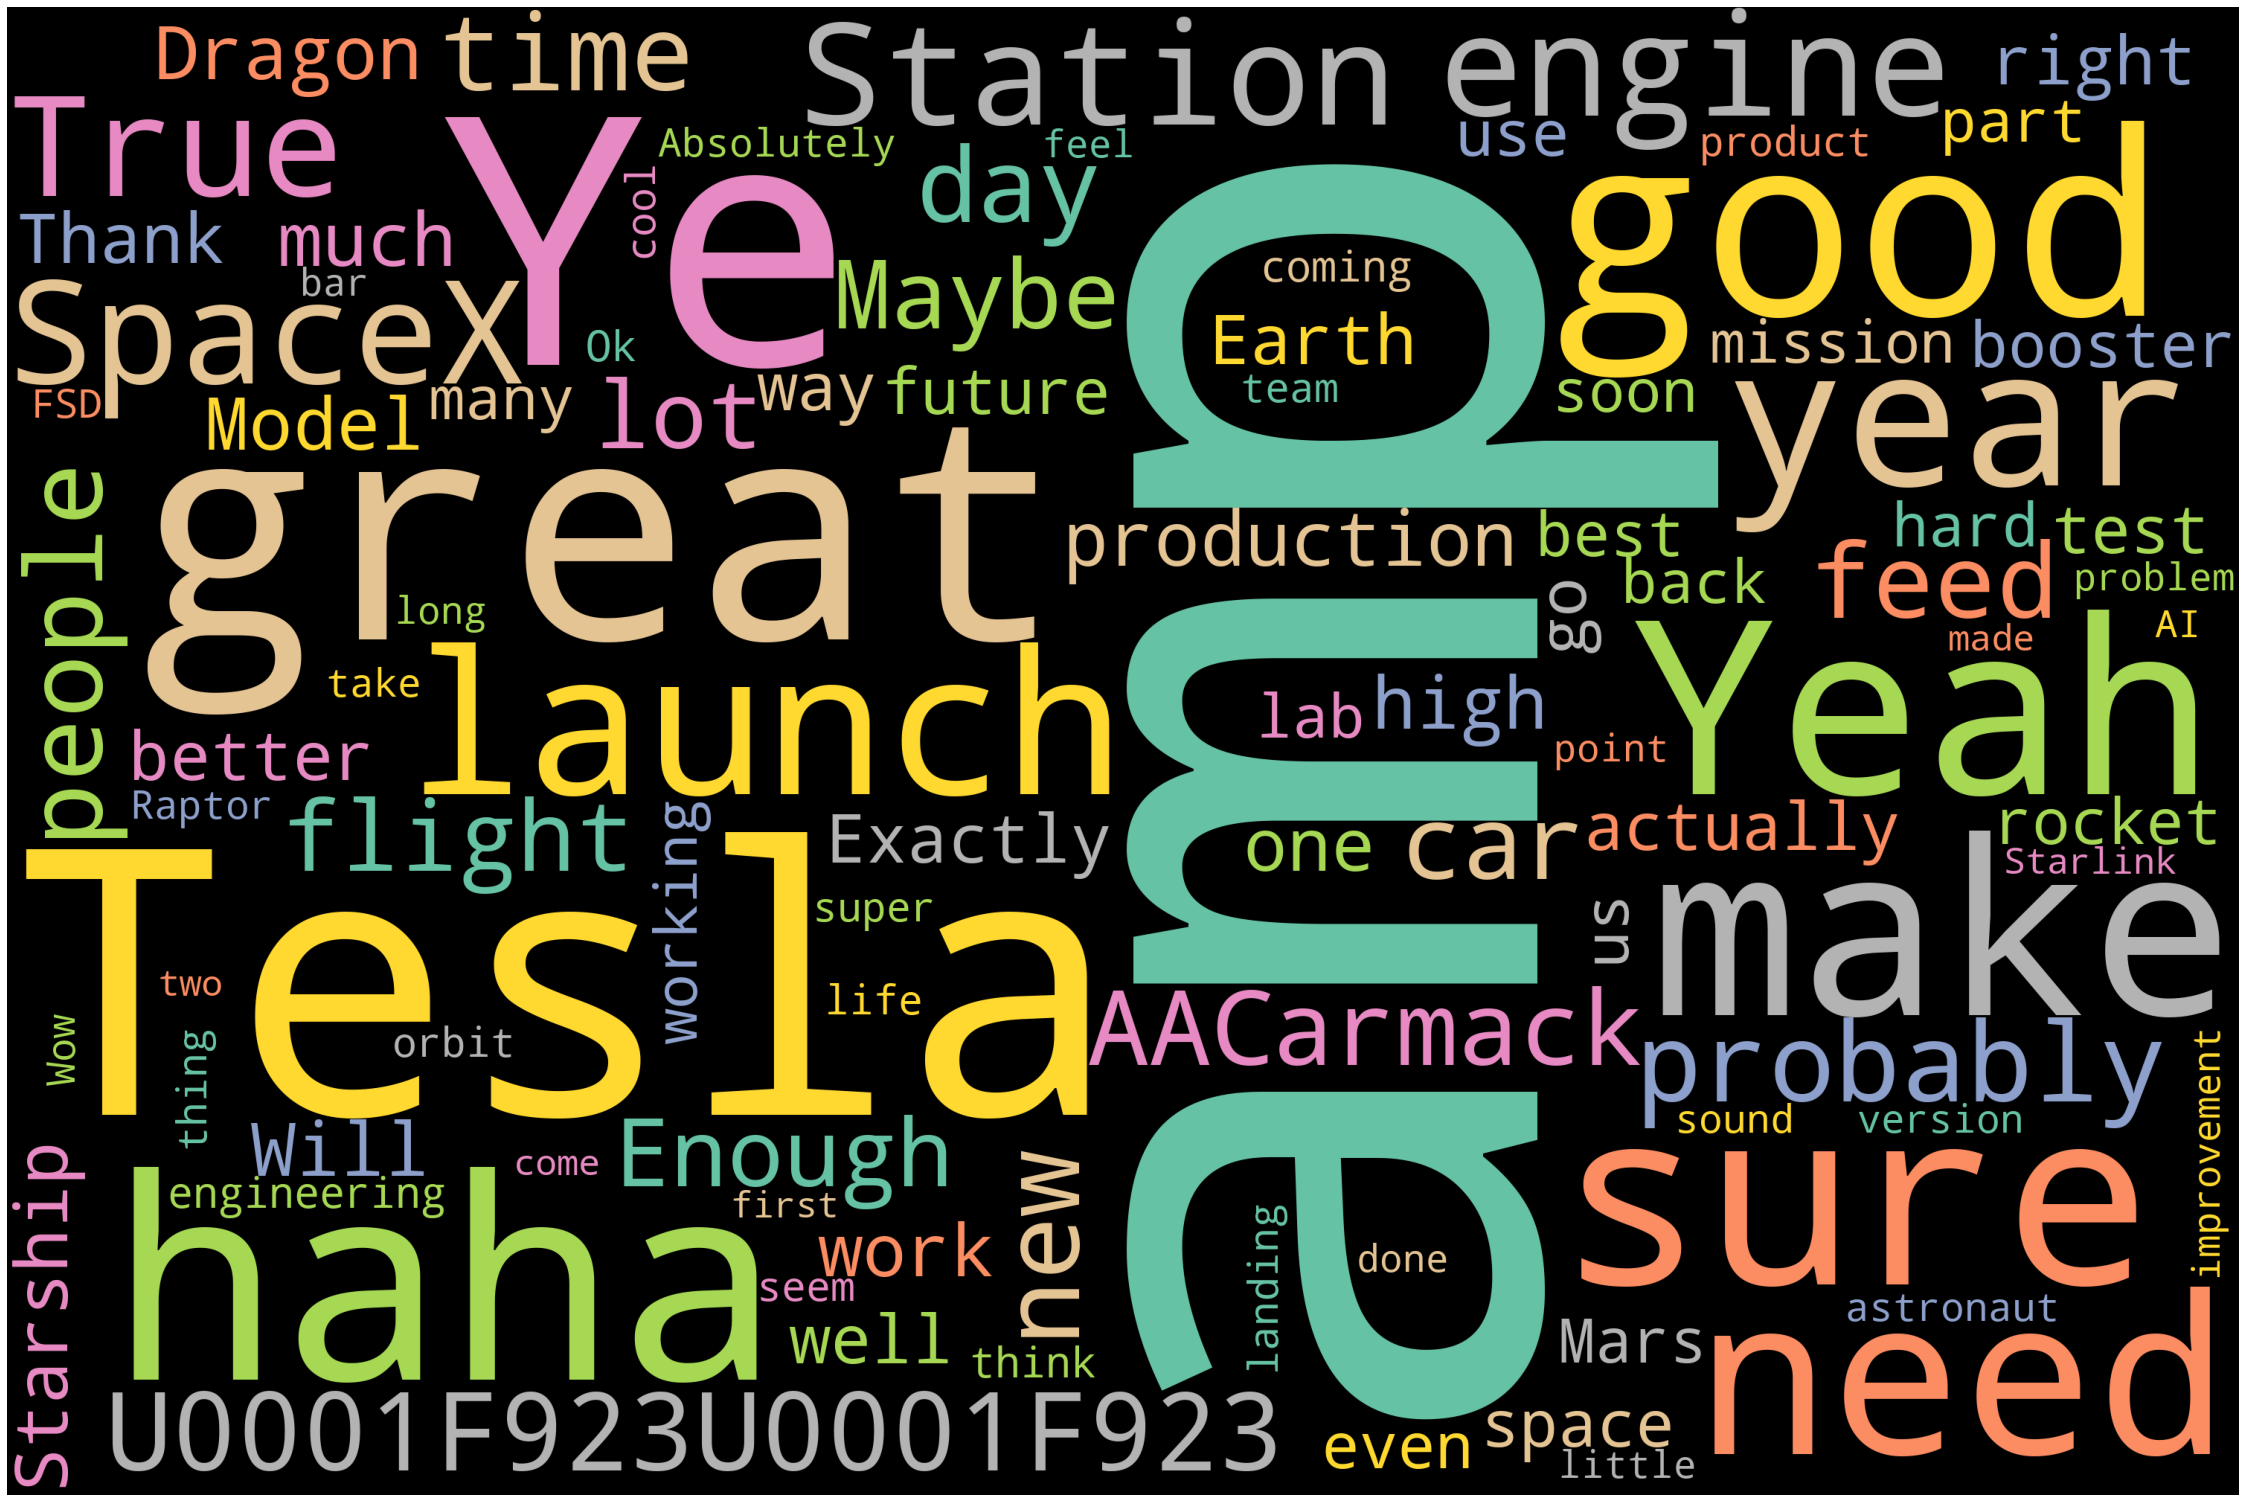

In [ ]:
# Generate wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2').generate(tweet_str)
plot_cloud(wordcloud)

Important words like 'Tesla', 'SpaceX', 'launch', 'Station' are mostly used.

In [ ]:
afinn=pd.read_csv('/content/Afinn.csv', sep=',', encoding='latin-1')
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


Negative values indicate Negative Sentiment and positive values indicate positive Sentiments.


In [ ]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [ ]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [ ]:
tweets_df['sentiment_value'] = tweets_df['Cleaned_tweets'].apply(calculate_sentiment)

In [ ]:
tweets_df.sort_values(by='sentiment_value').tail(5)

,Text,Cleaned_tweets,sentiment_value
469,@picot_john @CyberpunkGame It’s a good to grea...,john It’s a good to great game imo but improv...,10
1173,Thanks Tesla Team for great work on deliveries...,Thanks Tesla Team for great work on deliveries...,10
459,@teslaownerssv It will get absurdly good. Tesl...,It will get absurdly good Tesla AIAutopilot e...,10
1305,"One way or another, excitement guaranteed! Sup...",One way or another excitement guaranteed Suppo...,11
1389,"@GerberKawasaki Wow, I super loved astronomy (...",Wow I super loved astronomy but took it at Qu...,12


In [ ]:
# Sentiment score of the whole review
tweets_df['sentiment_value'].describe()

count    1999.00000
mean        0.67984
std         1.75916
min        -8.00000
25%         0.00000
50%         0.00000
75%         1.00000
max        12.00000
Name: sentiment_value, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


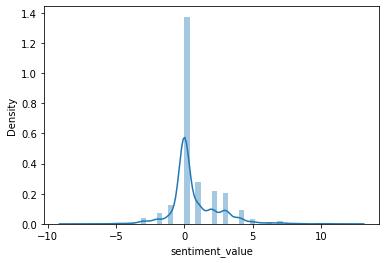

In [ ]:
import seaborn as sns
sns.distplot(tweets_df['sentiment_value'])

We can see that most of the tweets are neutral and the positive tweets are more than negative ones. In order to get the numbers of positive or negative tweets, we have to classify them based on their sentiment.

In [ ]:
# Let's classify these tweets based on their sentiment(polarity)
def sentiment(score):
    result = ''
    if score > 0:
        result = 'Positive'
    elif score == 0:
        result = 'Netural'
    else:
        result = 'Negative'
    return result

tweets_df['Sentiment'] = tweets_df.sentiment_value.apply(sentiment)

In [ ]:
tweets_df.head()

,Text,Cleaned_tweets,sentiment_value,Sentiment
1,@kunalb11 I’m an alien,I’m an alien,0,Netural
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,AACarmack Ray tracing on Cyberpunk with HDR is...,0,Netural
3,@joerogan @Spotify Great interview!,Great interview,3,Positive
4,@gtera27 Doge is underestimated,Doge is underestimated,-1,Negative
5,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execu...,4,Positive


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


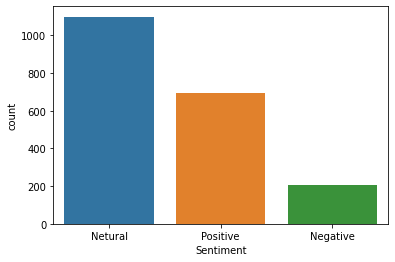

In [ ]:
sns.countplot(tweets_df['Sentiment'])
plt.show()

In [ ]:
tweets_df['Sentiment'].value_counts()

Netural     1099
Positive     696
Negative     204
Name: Sentiment, dtype: int64

Most of the tweets elon Musk made are neutral, i.e., neither positive nor negative.

Let us do the Subjectivity(personal feelings or thoughts). It values ranges from 0 to 1 where 0 is very objective and 1 is very subjective

In [ ]:
from textblob import TextBlob
def calc_sub(tweets):
  return TextBlob(tweets).sentiment.subjectivity

tweets_df['Subjectivity'] = tweets_df.Cleaned_tweets.apply(calc_sub)


In [ ]:
tweets_df.head()

,Text,Cleaned_tweets,sentiment_value,Sentiment,Subjectivity
1,@kunalb11 I’m an alien,I’m an alien,0,Netural,0.750000
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,AACarmack Ray tracing on Cyberpunk with HDR is...,0,Netural,0.000000
3,@joerogan @Spotify Great interview!,Great interview,3,Positive,0.750000
4,@gtera27 Doge is underestimated,Doge is underestimated,-1,Negative,0.000000
5,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execu...,4,Positive,0.366667


Text(0, 0.5, 'Subjectivity')

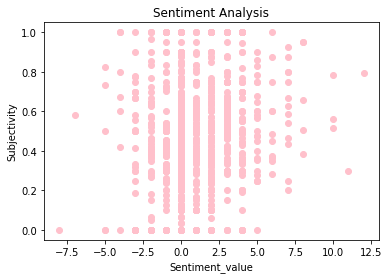

In [ ]:
plt.scatter(tweets_df.sentiment_value, tweets_df.Subjectivity, color='pink')
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment_value')
plt.ylabel('Subjectivity')

There are more dots on the positive side, which says his tweets are generally more positive than negative.

In [ ]:
tweets_df['index']=range(0,len(tweets_df))

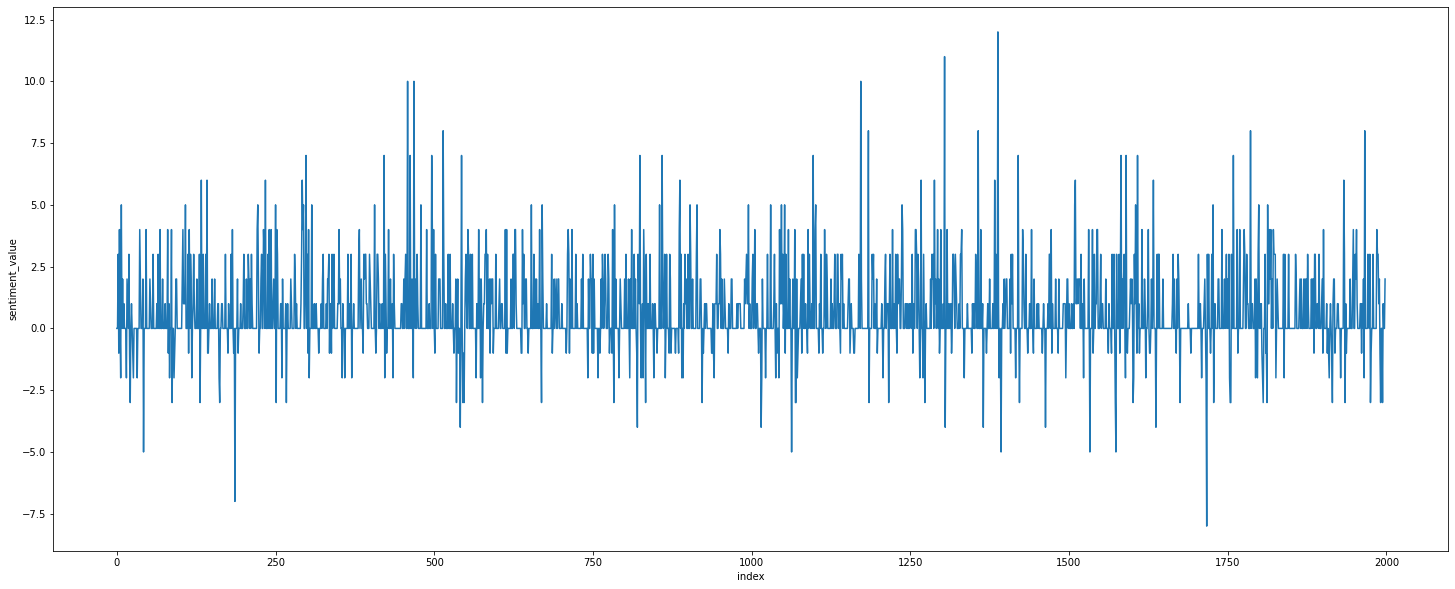

In [ ]:
plt.figure(figsize=(25, 10))
sns.lineplot(y='sentiment_value',x='index',data=tweets_df)

It is clear that the lines are more denser above the neutral line and hence positive tweets are more and there are also negative tweets Elon Musk made sometimes but are quite less.

In [ ]:
# how many words are in the sentence?
tweets_df['word_count'] = tweets_df['Cleaned_tweets'].str.split().apply(len)
tweets_df['word_count'].head(10)

1      3
2     13
3      2
4      3
5     16
6      6
7     13
8      2
9      9
10     8
Name: word_count, dtype: int64

Text(0, 0.5, 'Sentiment_value')

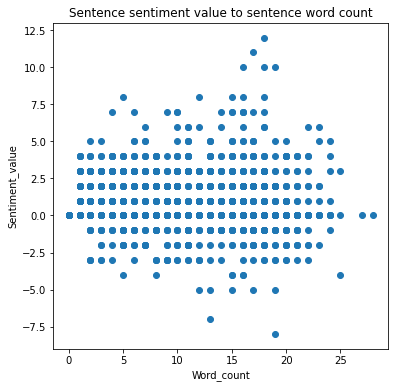

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(x='word_count', y='sentiment_value',data=tweets_df)
plt.title('Sentence sentiment value to sentence word count')
plt.xlabel('Word_count')
plt.ylabel('Sentiment_value')

In [ ]:
positive_tweets = tweets_df[tweets_df['Sentiment'] == 'Positive']
negative_tweets = tweets_df[tweets_df['Sentiment'] == 'Negative']

print('Positive tweets')
for i, row in positive_tweets[:5].iterrows():
  print(row['Cleaned_tweets'])

print('-------------------------------------------------------------------------')

print('Negative tweets')
for i, row in negative_tweets[:5].iterrows():
  print(row['Cleaned_tweets'])

Positive tweets
  Great interview
 Congratulations Tesla China for amazing execution last year Now on to the next for even more
   Haha thanks 
The most entertaining outcome is the most likely
Just agree to do Clubhouse with 
-------------------------------------------------------------------------
Negative tweets
 Doge is underestimated
Frodo was the underdoge
All thought he would fail
Himself most of all 
 He definitely has issues but the sentencing seems a bit high
 Any crypto wallet that won’t give you your private keys should be avoided at all costs
 Your app sucks


In [ ]:
len(positive_tweets)/len(negative_tweets)

3.411764705882353

Since the number is positive, and quite high ratio, we can conclude that Elon is a positive person.